In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
import matplotlib.pyplot as plt

In [2]:
df_titles_info = pd.read_csv('./output/US_count_vectorizer_dataset.csv')
df_titles_info.head()

,title,filter_title,filter_title_no_stops,category_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,we want to talk about our marriage,want talk marriage,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,the trump presidency last week tonight with jo...,trump presidency last week tonight john oliver...,Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman rudy mancuso king bach lele pons,racist superman rudy mancuso king bach lele pons,Comedy
3,Nickelback Lyrics: Real or Fake?,nickelback lyrics real or fake,nickelback lyrics real fake,Entertainment
4,I Dare You: GOING BALD!?,i dare you going bald,dare going bald,Entertainment


In [3]:
df_x = df_titles_info['filter_title']
df_y = df_titles_info['category_id']

target_names = list(df_titles_info['category_id'].unique())

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=117)

In [5]:
count_vectorizer = CountVectorizer()
train_count_vector = count_vectorizer.fit_transform(x_train)
test_count_vector = count_vectorizer.transform(x_test)

tfidf_vectorizer = TfidfTransformer()
x_trained_tfidf_vector = tfidf_vectorizer.fit_transform(train_count_vector)
x_test_tfidf_vector = tfidf_vectorizer.transform(test_count_vector)

tfidf normalized

In [6]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_trained_tfidf_vector,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
y_pred=clf.predict(x_test_tfidf_vector)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
normalized_accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.9881562881562882


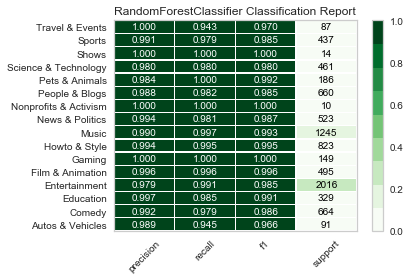

In [8]:
visualizer = ClassificationReport(clf, support=True, cmap='Greens')
visualizer.fit(x_trained_tfidf_vector, y_train)
visualizer.score(x_test_tfidf_vector, y_test)
visualizer.show()

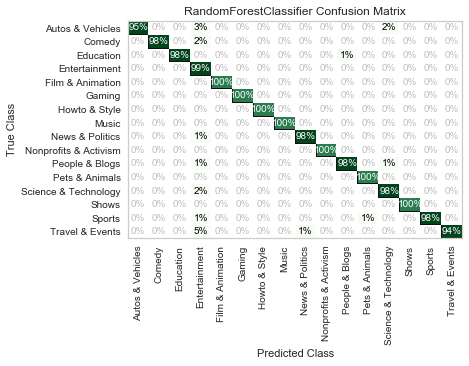

In [9]:
conf_matrix = ConfusionMatrix(clf, percent=True, cmap='Greens')
conf_matrix.fit(x_trained_tfidf_vector, y_train)
conf_matrix.score(x_test_tfidf_vector, y_test)
conf_matrix.show()

non normalized

In [10]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_count_vector,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
y_pred=clf.predict(test_count_vector)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
regular_accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.9880341880341881


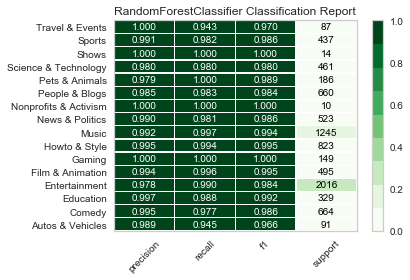

In [12]:
visualizer = ClassificationReport(clf, support=True, cmap='Greens')
visualizer.fit(train_count_vector, y_train)
visualizer.score(test_count_vector, y_test)
visualizer.show()

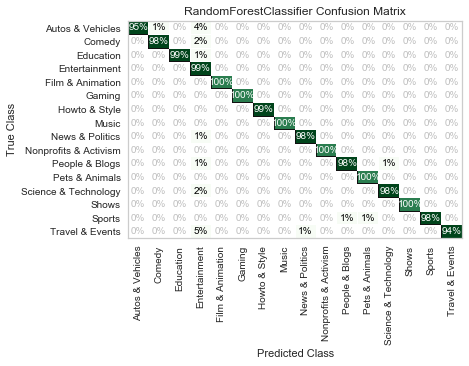

In [13]:
conf_matrix = ConfusionMatrix(clf, percent=True, cmap='Greens')
conf_matrix.fit(train_count_vector, y_train)
conf_matrix.score(test_count_vector, y_test)
conf_matrix.show()

no stop tfidf normalized

In [14]:
df_x = df_titles_info['filter_title_no_stops']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=117)

# replace NaN with spaces so count vectorizer can work
x_train = x_train.fillna(' ')
x_test = x_test.fillna(' ')

train_count_vector = count_vectorizer.fit_transform(x_train)
test_count_vector = count_vectorizer.transform(x_test)

tfidf_vectorizer = TfidfTransformer()
x_trained_tfidf_vector = tfidf_vectorizer.fit_transform(train_count_vector)
x_test_tfidf_vector = tfidf_vectorizer.transform(test_count_vector)

In [15]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_trained_tfidf_vector,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred=clf.predict(x_test_tfidf_vector)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
normalized_accuracy_stop = accuracy_score(y_test, y_pred)

Accuracy: 0.9863247863247864


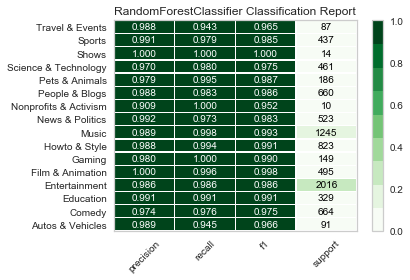

In [17]:
visualizer = ClassificationReport(clf, support=True, cmap='Greens')
visualizer.fit(x_trained_tfidf_vector, y_train)
visualizer.score(x_test_tfidf_vector, y_test)
visualizer.show()

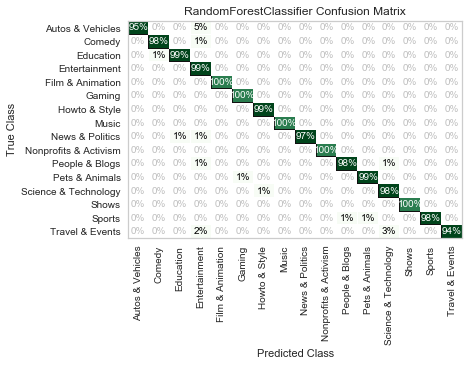

In [18]:
conf_matrix = ConfusionMatrix(clf, percent=True, cmap='Greens')
conf_matrix.fit(x_trained_tfidf_vector, y_train)
conf_matrix.score(x_test_tfidf_vector, y_test)
conf_matrix.show()

no stop non normalized

In [19]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_count_vector,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred=clf.predict(test_count_vector)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
regular_accuracy_stop = accuracy_score(y_test, y_pred)

Accuracy: 0.9875457875457876


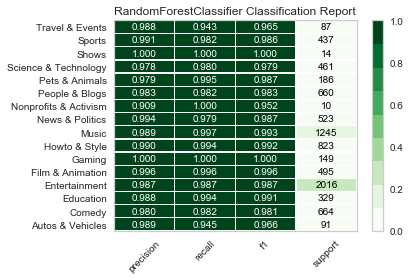

In [21]:
visualizer = ClassificationReport(clf, support=True, cmap='Greens')
visualizer.fit(train_count_vector, y_train)
visualizer.score(test_count_vector, y_test)
visualizer.show()

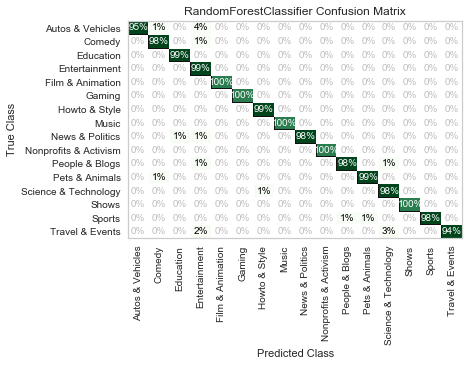

In [22]:
conf_matrix = ConfusionMatrix(clf, percent=True, cmap='Greens')
conf_matrix.fit(train_count_vector, y_train)
conf_matrix.score(test_count_vector, y_test)
conf_matrix.show()

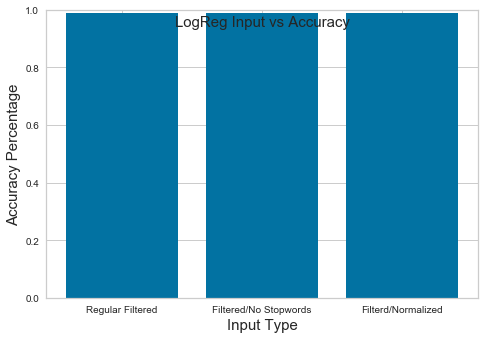

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim(0, 1)
x = ["Regular Filtered", "Filtered/No Stopwords", "Filterd/Normalized"]
y = [regular_accuracy, regular_accuracy_stop, normalized_accuracy]

fig.suptitle('LogReg Input vs Accuracy', fontsize=15)
plt.xlabel('Input Type', fontsize=15)
plt.ylabel('Accuracy Percentage', fontsize=15)
ax.bar(x,y)
plt.show()